$$
Oasis Infobyte Internship
$$

Name: Mayuri Kale

Email: mayurikale1947@gmail.com

Task 5 : SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors
 such as the amount you spend to advertise your product, the segment of people you
 advertise for, or the platform you are advertising on about your product.
 
 Typically, a product and service-based business always need their Data Scientist to predict
 their future sales with every step they take to manipulate the cost of advertising their
 product. So let’s start the task of sales prediction with machine learning using Python

## Import necessary libraries

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


## Load and explore dataset

In [2]:
# Load the data
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

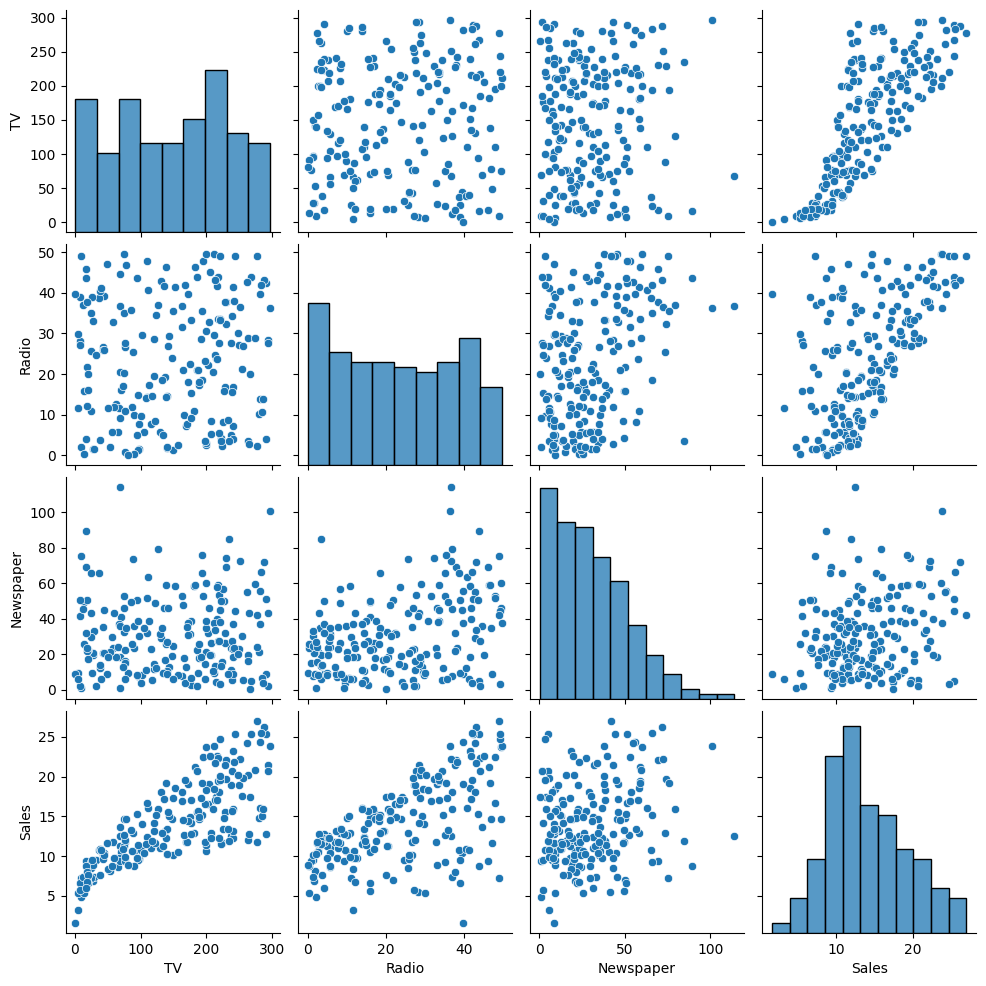

In [10]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

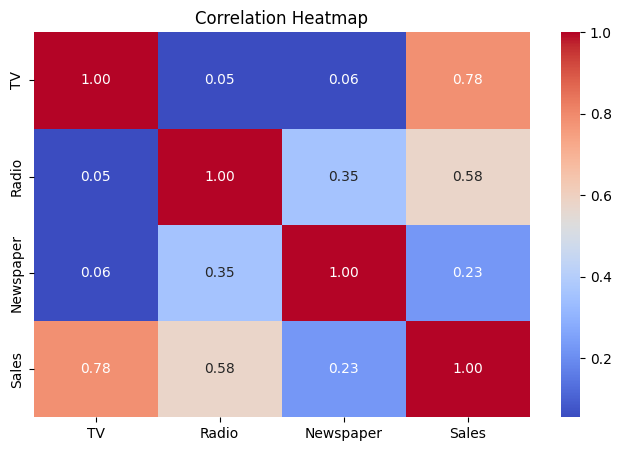

In [11]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Define features and target variable
X = data.drop(columns=["Sales"])
y = data["Sales"]

In [14]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R^2 Score:",r2) 


Mean Absolute Error: 1.4607567168117606
Mean Squared Error: 3.174097353976104
Root Mean Squared Error: 1.7815996615334502
R^2 Score: 0.899438024100912


This indicates that the model has a good fit, though some variance remains unexplained

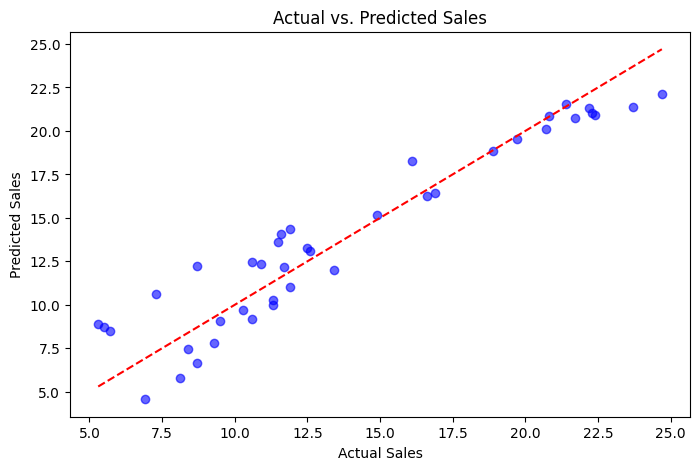

In [18]:
# Visualizing Actual vs. Predicted Sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

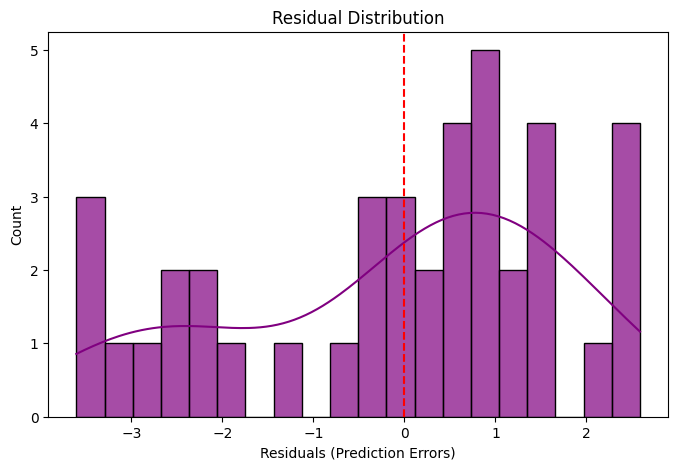

In [19]:
# Residual Plot (Errors vs. Predictions)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='purple', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='dashed')  # Zero error reference line
plt.xlabel("Residuals (Prediction Errors)")
plt.title("Residual Distribution")
plt.show()

In [21]:
# Create a Polynomial Regression model (degree = 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_test)

# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = mse_poly ** 0.5
r2_poly = r2_score(y_test, y_poly_pred)

print("Mean Absolute Error (Polynomial):",mae_poly)
print("Mean Squared Error (Polynomial):",mse_poly)
print("Root Mean Squared Error (Polynomial):",rmse_poly)
print("R^2 Score (Polynomial):",r2_poly)

Mean Absolute Error (Polynomial): 0.5261794444043999
Mean Squared Error (Polynomial): 0.4129102285379215
Root Mean Squared Error (Polynomial): 0.642580912055378
R^2 Score (Polynomial): 0.9869181490609598


This suggests a stronger fit with less error, meaning a non-linear relationship exists between ad spend and sales

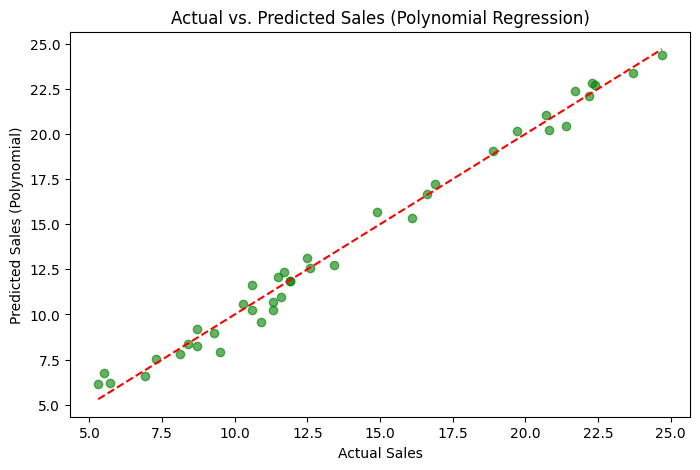

In [22]:
# Visualizing Actual vs. Predicted Sales for Polynomial Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_poly_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Polynomial)")
plt.title("Actual vs. Predicted Sales (Polynomial Regression)")
plt.show()


**Actual vs. Predicted Sales Plot :**

Predictions align more closely with actual sales compared to Linear Regression.

Less deviation from the perfect prediction line, confirming better accuracy.


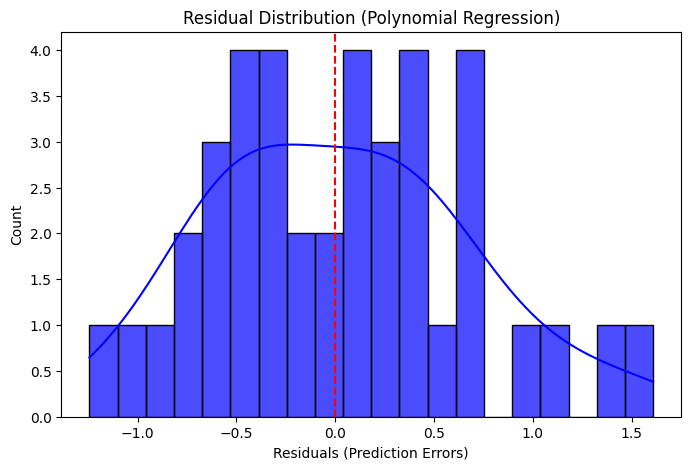

In [23]:
# Residual Plot for Polynomial Regression
residuals_poly = y_test - y_poly_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals_poly, bins=20, kde=True, color='blue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='dashed')  # Zero error reference line
plt.xlabel("Residuals (Prediction Errors)")
plt.title("Residual Distribution (Polynomial Regression)")
plt.show()

**Residual Distribution Plot :**

Residuals are even more centered around zero, meaning fewer errors.

The distribution is narrower, indicating reduced variance in predictions.


## Conclusion

   Linear Regression performed well with 89.9% accuracy (R² = 0.899) but had some prediction errors.

   Polynomial Regression (degree = 2) significantly improved accuracy to 98.7% (R² = 0.987), reducing errors and better capturing non-linear relationships.

   Visualizations confirmed that Polynomial Regression fits the data best, making it the optimal choice for this sales prediction task.